In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
import matplotlib.ticker as ticker



In [2]:
data = pd.read_csv('housing_sales_ma_ (1).csv')
data.head()

,price_£,proprety type,surface,bedroom,bathroom,address,city,principale
0,239769.0,Apartment,1399.31,2,2,"Ennakhil-(Palmeraie), Marrakech, Marrakesh-Safi",Marrakech,Marrakesh-Safi
1,1798271.0,House,14531.28,6,6,"Ennakhil-(Palmeraie), Marrakech, Marrakesh-Safi",Marrakech,Marrakesh-Safi
2,434582.0,House,4305.56,4,6,"Ménara, Marrakech, Marrakesh-Tensift-El Haouz",Marrakech,Marrakesh-Tensift-El Haouz
3,129875.0,Apartment,893.40,2,2,"Guéliz, Marrakech, Marrakesh-Tensift-El Haouz ...",Marrakech,Marrakesh-Tensift-El Haouz
4,199808.0,Apartment,1367.02,3,2,"Anfa, Casablanca, Casablanca-Settat",Casablanca,Casablanca-Settat


In [3]:
print(data.dtypes)


price_£          float64
proprety type     object
surface          float64
bedroom            int64
bathroom           int64
address           object
city              object
principale        object
dtype: object


# **Filtrage**

In [4]:
# Filtrer les données pour la superficie entre 50 et 2500 m² et le prix entre 30,000 et 300,000 €
filtered_data = data[(data['surface'] >= 50) & (data['surface'] <= 2500) &
                     (data['price_£'] >= 30000) & (data['price_£'] <= 300000)]

In [5]:
# Définir les nouvelles variables filtrées
x_filtered = filtered_data['surface']
y_filtered = filtered_data['price_£']

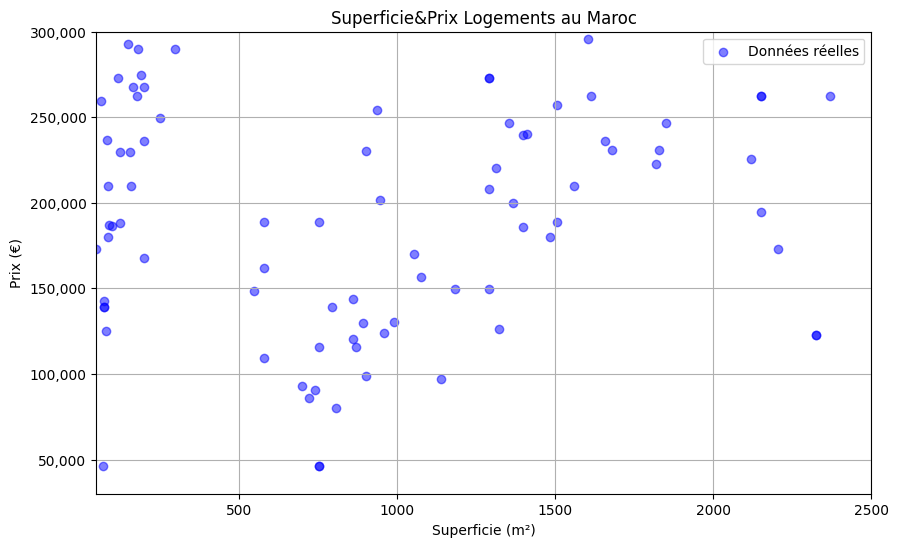

In [6]:
# Tracer les données filtrées et la droite prédictive
plt.figure(figsize=(10, 6))
plt.scatter(x_filtered, y_filtered, label="Données réelles", c='blue', alpha=0.5)
plt.xlim([50, 2500])  # Limites basées sur les données filtrées
plt.ylim([30000, 300000])  # Limites basées sur les données filtrées
plt.xlabel("Superficie (m²)")
plt.ylabel("Prix (€)")
plt.legend()
plt.title("Superficie&Prix Logements au Maroc")
plt.grid(True)

# Formatage des ticks pour afficher les prix
formatter = ticker.FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

# **Modele Linéaire**

In [7]:
# Initialisation du modèle linéaire de Scikit-learn
model = LinearRegression()

In [8]:
# Ajustement du modèle aux données filtrées - 2D
model.fit(x_filtered.values.reshape(-1, 1), y_filtered)

LinearRegression()

In [9]:
# Prédictions
y_pred_sklearn = model.predict(x_filtered.values.reshape(-1, 1))

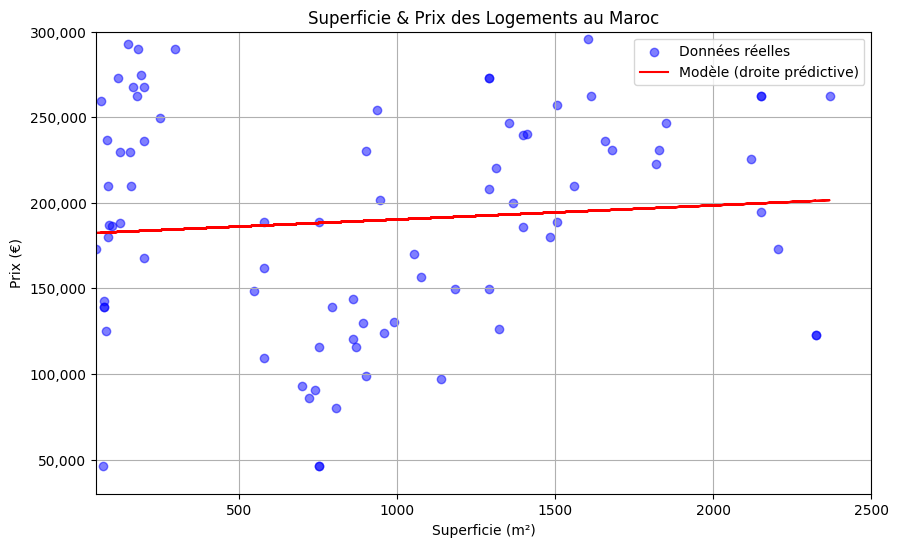

In [10]:
# Tracer les données filtrées et la droite prédictive
plt.figure(figsize=(10, 6))
plt.scatter(x_filtered, y_filtered, label="Données réelles", c='blue', alpha=0.5)
plt.plot(x_filtered, y_pred_sklearn, c='r', label="Modèle (droite prédictive)")
plt.xlim([50, 2500])  # Limites basées sur les données filtrées
plt.ylim([30000, 300000])  # Limites basées sur les données filtrées
plt.xlabel("Superficie (m²)")
plt.ylabel("Prix (€)")
plt.legend()
plt.title("Superficie & Prix des Logements au Maroc")
plt.grid(True)

# Formatage des ticks pour afficher les prix
formatter = ticker.FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [11]:
X = np.c_[np.ones((x_filtered.shape[0], 1)), x_filtered.values]
y = y_filtered.values.reshape(-1, 1)  # Convertir y_filtered en vecteur colonne (84, 1)


In [12]:
print(x_filtered.shape)
print(X.shape)
print(y.shape)

(84,)
(84, 2)
(84, 1)


In [13]:
theta = np.zeros((2, 1))  # Vecteur theta (2, 1)

# **Fonction Cout**

In [14]:
def model(X, theta):
        return np.dot(X, theta)  # Produit matriciel entre X et theta

In [15]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [16]:
# Calculer la valeur initiale de la fonction de coût
initial_cost = cost_function(X, y_filtered.values.reshape(-1, 1), theta)
print(f"Coût initial : {initial_cost}")

Coût initial : 20044532038.5


# **Gradients&Descente de Gradient**

In [17]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [18]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]

    return theta, cost_history